In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import chi2
import seaborn as sns

In [2]:
df = pd.read_csv("D:\\ml project\\data\\cleaned_aviation_data.csv")
df.columns

C:\Users\garvg\AppData\Local\Temp\ipykernel_5448\781196009.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\\ml project\\data\\cleaned_aviation_data.csv")


Index(['Unnamed: 0', 'event_id', 'investigation_type', 'event_date',
       'location', 'country', 'injury_severity', 'aircraft_damage',
       'aircraft_category', 'make', 'model', 'amateur_built',
       'number_of_engines', 'engine_type', 'far_description', 'schedule',
       'purpose_of_flight', 'air_carrier', 'total_fatal_injuries',
       'total_serious_injuries', 'total_minor_injuries', 'total_uninjured',
       'weather_condition', 'broad_phase_of_flight', 'aircarft_damage'],
      dtype='object')

In [3]:
df.shape


(73291, 25)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73291 entries, 0 to 73290
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              73291 non-null  int64  
 1   event_id                73291 non-null  object 
 2   investigation_type      73291 non-null  object 
 3   event_date              73291 non-null  object 
 4   location                73259 non-null  object 
 5   country                 73079 non-null  object 
 6   injury_severity         73291 non-null  object 
 7   aircraft_damage         71137 non-null  object 
 8   aircraft_category       73291 non-null  object 
 9   make                    73291 non-null  object 
 10  model                   73291 non-null  object 
 11  amateur_built           73290 non-null  object 
 12  number_of_engines       69317 non-null  float64
 13  engine_type             68471 non-null  object 
 14  far_description         27094 non-null

In [5]:
df= df[df["injury_severity"] != "unknown"]

In [6]:
df["injury_severity"] = df["injury_severity"].replace({"incident":"non-fatal"})

In [7]:
df["injury_severity"].value_counts()

injury_severity
non-fatal    58208
fatal        14681
Name: count, dtype: int64

In [8]:
pd.crosstab(df["injury_severity"],df["aircraft_damage"])

aircraft_damage,Destroyed,Minor,Substantial,Unknown
injury_severity,,,,
fatal,10429,92,3943,24
non-fatal,5249,1993,48983,60


In [9]:
pd.crosstab(df["injury_severity"],df["broad_phase_of_flight"])


broad_phase_of_flight,approach,climb,cruise,descent,go_around,landing,maneuvering,other,takeoff,taxi,unknown
injury_severity,,,,,,,,,,,
fatal,1215,494,2233,360,205,209,2469,111,1412,29,363
non-fatal,3939,1142,6009,1132,857,11544,3993,673,8535,1478,105


In [10]:
df.isnull().sum().sort_values(ascending=False)

schedule                  62631
air_carrier               57453
far_description           46184
broad_phase_of_flight     24382
engine_type                4530
number_of_engines          3916
weather_condition          2977
aircarft_damage            2116
aircraft_damage            2116
country                     212
location                     29
amateur_built                 1
injury_severity               0
event_id                      0
Unnamed: 0                    0
investigation_type            0
event_date                    0
aircraft_category             0
purpose_of_flight             0
model                         0
make                          0
total_minor_injuries          0
total_serious_injuries        0
total_fatal_injuries          0
total_uninjured               0
dtype: int64

In [11]:
df = df.drop(columns = ["schedule","air_carrier","far_description"],errors =  "ignore")

In [12]:
df["injury_severity"].value_counts(dropna=False)



injury_severity
non-fatal    58208
fatal        14681
Name: count, dtype: int64

In [13]:
df["injury_severity"].value_counts(normalize=True)

injury_severity
non-fatal    0.798584
fatal        0.201416
Name: proportion, dtype: float64

In [14]:
cat_cols = df.select_dtypes(include = "object").columns.drop("injury_severity")

In [15]:
encoded_df= df.copy()
for col in cat_cols:
    le  = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col])

encoded_df["injury_severity_encoded"]  = LabelEncoder().fit_transform(encoded_df["injury_severity"])

In [16]:
chi_scores , p_values = chi2(encoded_df[cat_cols], encoded_df["injury_severity_encoded"])
chi_importance = pd.DataFrame({
    "feature": cat_cols,
    "chi2_score": chi_scores,
    "p_value": p_values
}).sort_values(by="chi2_score", ascending=False)

chi_importance

,feature,chi2_score,p_value
8,model,966740.030359,0.000000e+00
0,event_id,691587.832998,0.000000e+00
2,event_date,304201.440330,0.000000e+00
7,make,80874.453257,0.000000e+00
14,aircarft_damage,11475.530610,0.000000e+00
5,aircraft_damage,11475.530610,0.000000e+00
4,country,8967.037253,0.000000e+00
3,location,756.967076,1.226077e-166
1,investigation_type,637.118278,1.414734e-140
12,weather_condition,488.290398,3.355857e-108


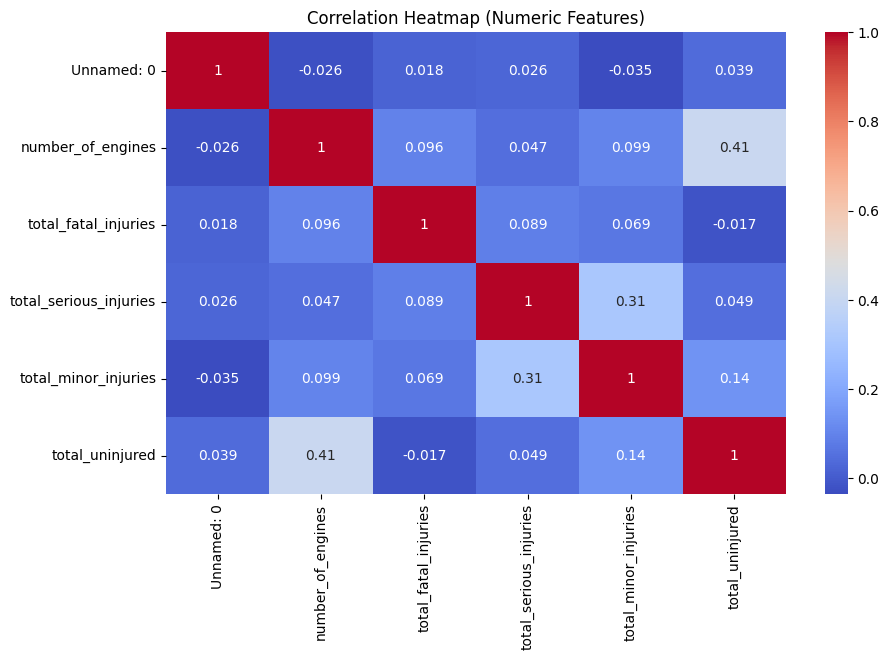

In [17]:
numeric_df = df.select_dtypes(include=["int64", "float64"])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()



=== aircraft_damage ===


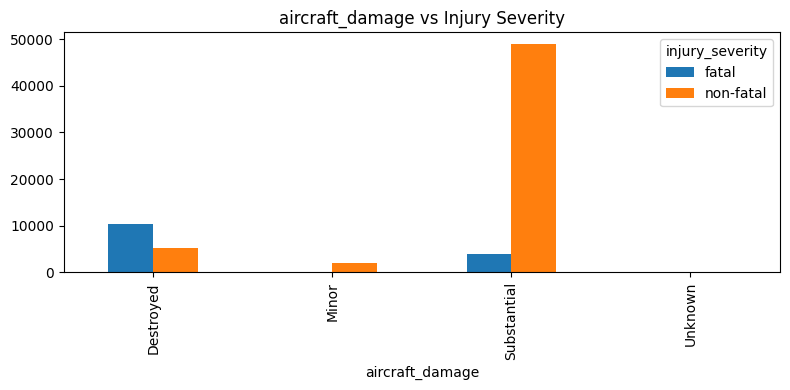


=== broad_phase_of_flight ===


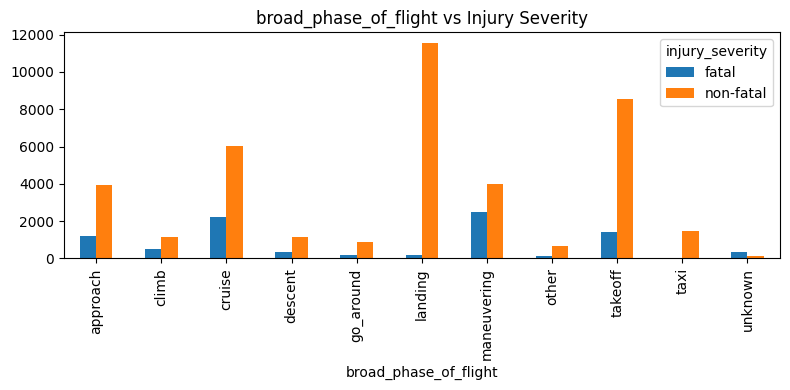


=== purpose_of_flight ===


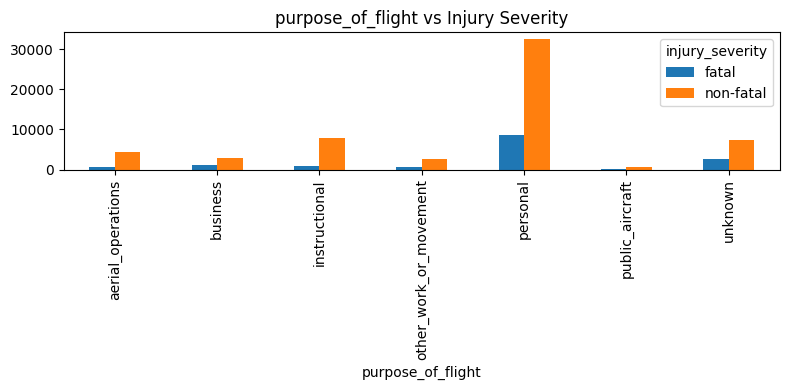


=== weather_condition ===


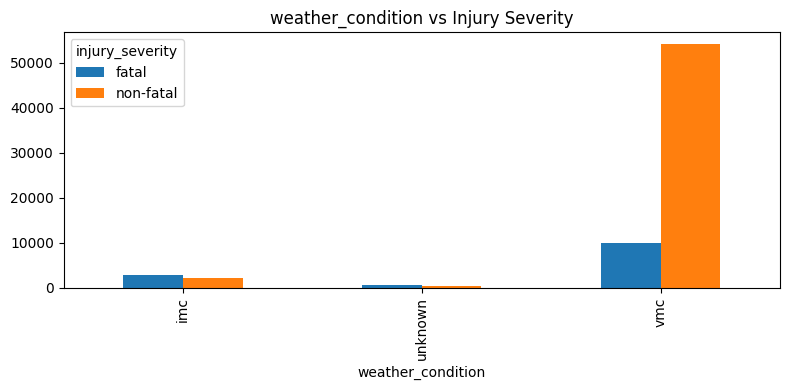


=== aircraft_category ===


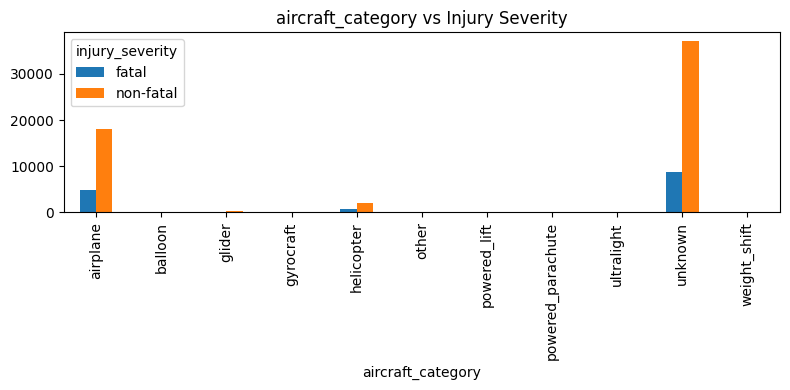

In [18]:
important_cats = [
    "aircraft_damage",
    "broad_phase_of_flight",
    "purpose_of_flight",
    "weather_condition",
    "aircraft_category"
]

for col in important_cats:
    print(f"\n=== {col} ===")
    ctab = pd.crosstab(df[col], df["injury_severity"])
    ctab.plot(kind="bar", figsize=(8, 4))
    plt.title(f"{col} vs Injury Severity")
    plt.tight_layout()
    plt.show()



In [19]:
df = df.drop(columns = ["aircarft_damage"])

<Figure size 600x400 with 0 Axes>

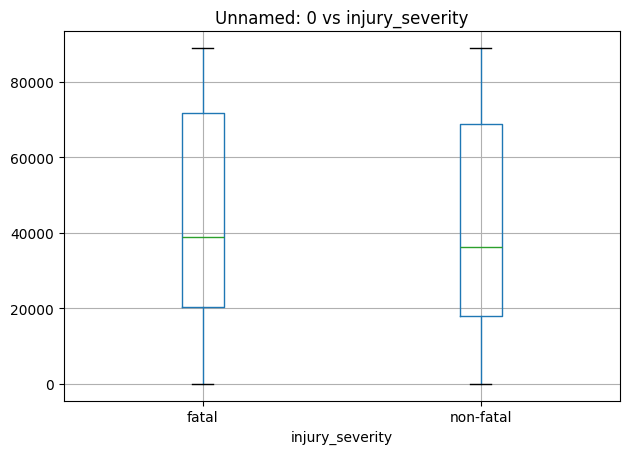

<Figure size 600x400 with 0 Axes>

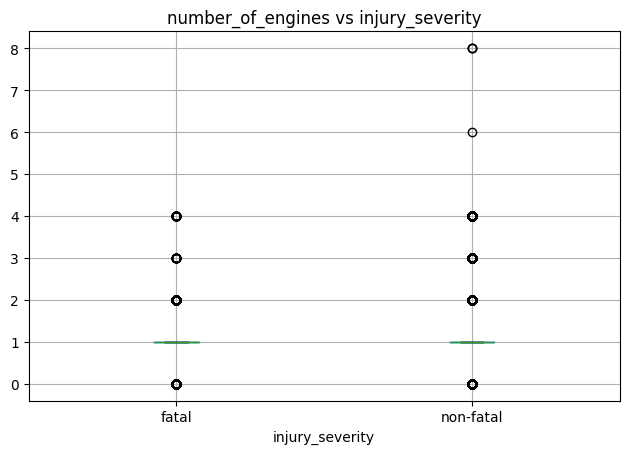

<Figure size 600x400 with 0 Axes>

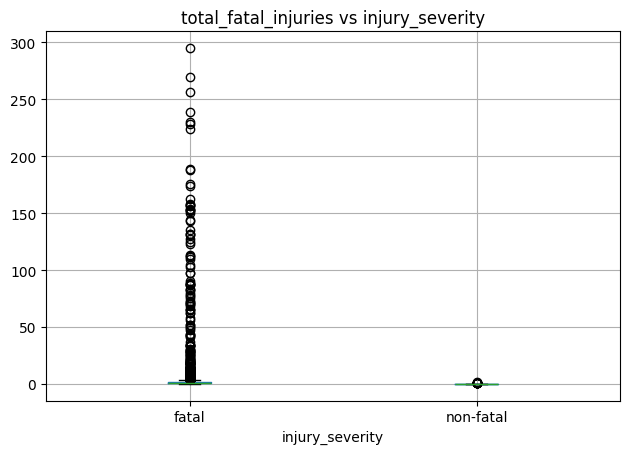

<Figure size 600x400 with 0 Axes>

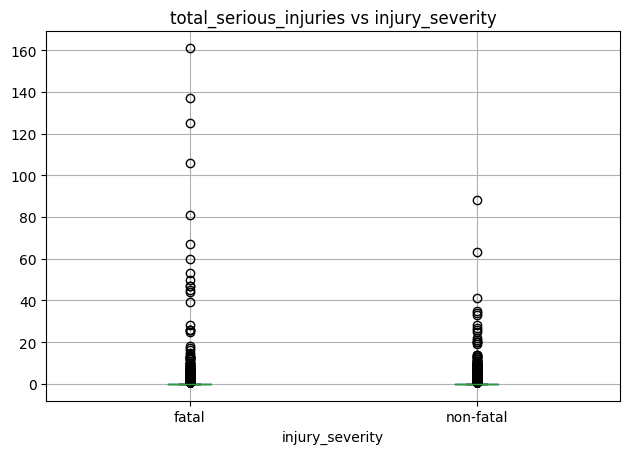

<Figure size 600x400 with 0 Axes>

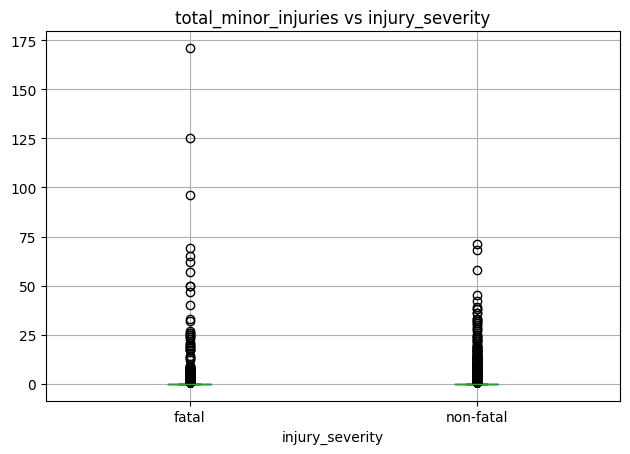

<Figure size 600x400 with 0 Axes>

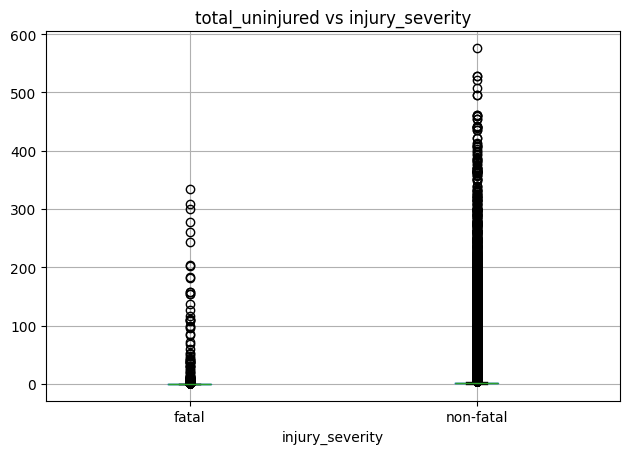

In [20]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    df.boxplot(column=col, by="injury_severity")
    plt.title(f"{col} vs injury_severity")
    plt.suptitle("")
    plt.tight_layout()
    plt.show()


In [21]:
df.to_csv("D:\\ml project\\data\\EDA_aviation_data.csv")

In [22]:
df.columns.tolist()

['Unnamed: 0',
 'event_id',
 'investigation_type',
 'event_date',
 'location',
 'country',
 'injury_severity',
 'aircraft_damage',
 'aircraft_category',
 'make',
 'model',
 'amateur_built',
 'number_of_engines',
 'engine_type',
 'purpose_of_flight',
 'total_fatal_injuries',
 'total_serious_injuries',
 'total_minor_injuries',
 'total_uninjured',
 'weather_condition',
 'broad_phase_of_flight']